# Irish population age dynamics analysis

In [12]:
# Importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Load the CSV file
file_path = "C:\\Users\\franc\\OneDrive\\Desktop\\Irish_age_data_2020-2024.csv"
df = pd.read_csv(file_path)

In [14]:
# Give a first look to the data
print(df.head())

                           STATISTIC Label  Year      Age Group     Sex  \
0  Population Estimates (Persons in April)  2020   0 - 14 years    Male   
1  Population Estimates (Persons in April)  2020   0 - 14 years  Female   
2  Population Estimates (Persons in April)  2020  10 - 14 years    Male   
3  Population Estimates (Persons in April)  2020  10 - 14 years  Female   
4  Population Estimates (Persons in April)  2020  15 - 19 years    Male   

       UNIT  VALUE  
0  Thousand  519.9  
1  Thousand  493.7  
2  Thousand  181.6  
3  Thousand  173.2  
4  Thousand  166.4  


In [15]:
# Checking columns in the dataset
print(df.columns)

Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'UNIT', 'VALUE'], dtype='object')


In [16]:
# Checking the types of data we have in the dataset
print(df.dtypes)

STATISTIC Label     object
Year                 int64
Age Group           object
Sex                 object
UNIT                object
VALUE              float64
dtype: object


## Analysis of the age group distribution

The goal of this analysis is to explore how the population is distributed across age groups over time. By visualizing these distributions,  aim to identify overall patterns and changes in the demographic structure, while also providing a clear view of differences between males and females. This step serves as a starting point for understanding the broader demographic trends in Ireland.

In [19]:
# calculation of total population by age group and sex
age_group = df["Age Group"].unique()
male_values = df[df["Sex"] == "Male"].groupby("Age Group")["VALUE"].sum()
female_values = df[df["Sex"] == "Female"].groupby("Age Group")["VALUE"].sum()
print(male_values, female_values)

Age Group
0 - 14 years         2587.1
10 - 14 years         948.0
15 - 19 years         871.0
20 - 24 years         801.5
25 - 29 years         760.6
30 - 34 years         813.1
35 - 39 years         922.4
40 - 44 years        1008.9
45 - 49 years         931.6
50 - 54 years         852.9
55 - 59 years         763.5
60 - 64 years         682.5
65 - 69 years         590.5
70 - 74 years         498.2
75 - 79 years         369.3
80 - 84 years         220.9
85 years and over     156.7
Name: VALUE, dtype: float64 Age Group
0 - 14 years         2470.4
10 - 14 years         906.8
15 - 19 years         831.5
20 - 24 years         772.3
25 - 29 years         758.4
30 - 34 years         861.6
35 - 39 years        1003.6
40 - 44 years        1066.5
45 - 49 years         951.6
50 - 54 years         858.8
55 - 59 years         782.1
60 - 64 years         703.9
65 - 69 years         609.1
70 - 74 years         520.4
75 - 79 years         402.6
80 - 84 years         267.6
85 years and over     259.1


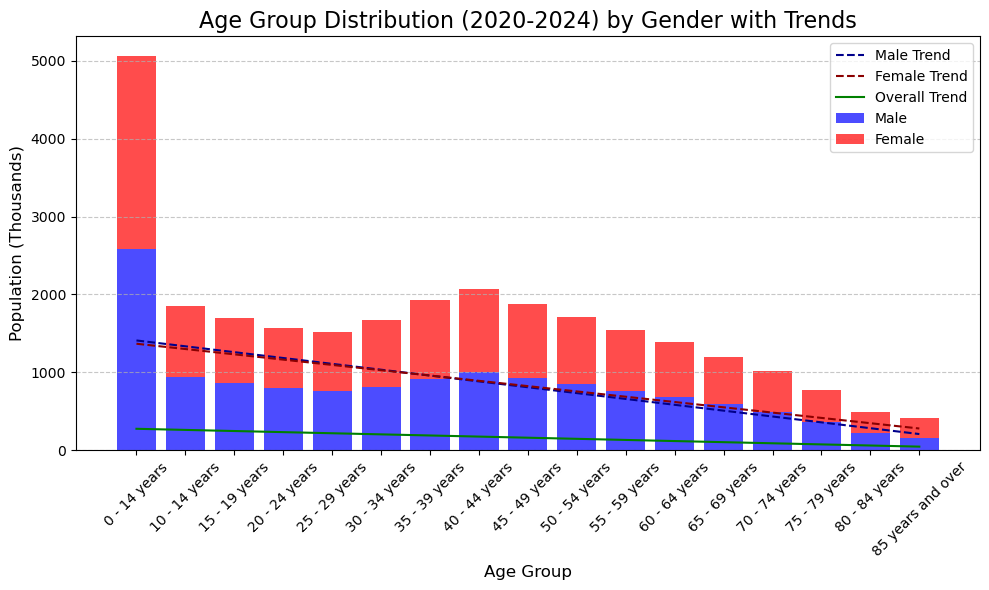

In [24]:
# Let's create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_group, male_values, label="Male", color="blue", alpha=0.7)
plt.bar(age_group, female_values, bottom=male_values, label="Female", color="red", alpha=0.7)

# Let's create some trend lines per gender
male_trend = np.poly1d(np.polyfit(range(len(age_group)), male_values, 1))(range(len(age_group)))
female_trend = np.poly1d(np.polyfit(range(len(age_group)), female_values, 1))(range(len(age_group)))

plt.plot(age_group, male_trend, color="darkblue", linestyle="--", label="Male Trend")
plt.plot(age_group, female_trend, color="darkred", linestyle="--", label="Female Trend")

# Let's also draw a general trend line
overall_mean_values = df.groupby("Age Group")["VALUE"].mean()
overall_trend = np.poly1d(np.polyfit(range(len(age_group)), overall_mean_values, 1))(range(len(age_group)))

plt.plot(age_group, overall_trend, color="green", linestyle="-", label="Overall Trend")

# Personalization of the graph
plt.title("Age Group Distribution (2020-2024) by Gender with Trends", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Population (Thousands)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Detailed breakdown of age group distribution by year and gender with trend analysis with scatter plots

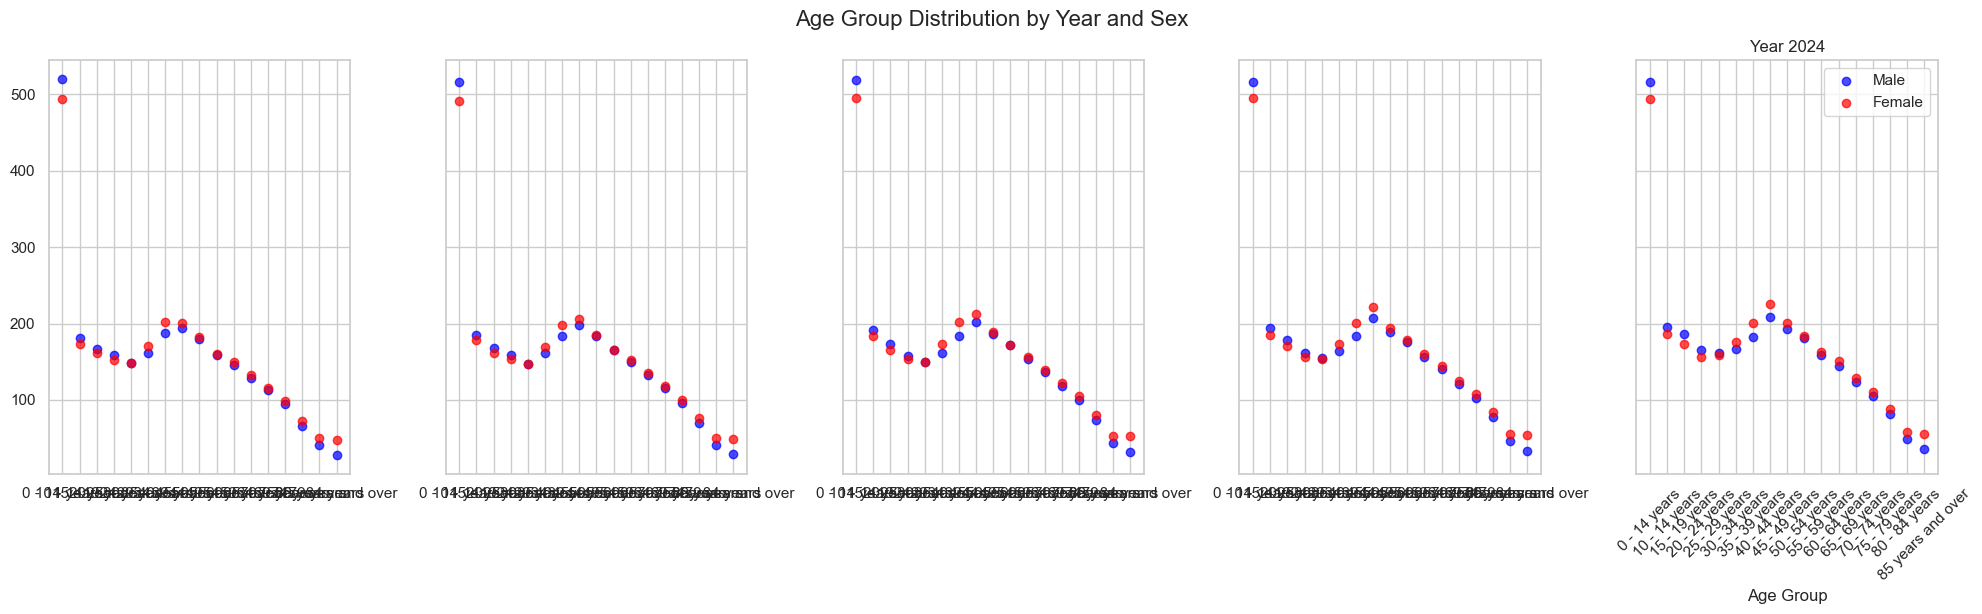

In [29]:
# Configuration of the style of the plot
sns.set(style="whitegrid")
years = df["Year"].unique()

# Definition of colors by gender
colors = {"Male": "blue", "Female": "red"}

# Creation of subplots
fig, axes = plt.subplots(1, len(years), figsize=(20, 6), sharey=True)
for i, year in enumerate(years):
    ax = axes[i] if len(years) > 1 else axes  # Support for a single plot
    # I filter data for specific year
    year_data = df[df["Year"] == year]
    # Scatter plot divided by gender
    for sex in year_data["Sex"].unique():
        sex_data = year_data[year_data["Sex"] == sex]
        ax.scatter(
            sex_data["Age Group"],
            sex_data["VALUE"],
            label=sex,
            color=colors[sex],
            alpha=0.7
        )
        
# Plot personalization
ax.set_title(f"Year {year}")
ax.set_xlabel("Age Group")
ax.legend()
ax.tick_params(axis="x", rotation=45)

# Improvement of layout for better vision
plt.tight_layout()
plt.suptitle("Age Group Distribution by Year and Sex", fontsize=16, y=1.02)
plt.show()